# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing dataset

In [ ]:
dataset=pd.read_csv('advertising_sales_data.csv')

# Splitting dataset into independent and dependent set

In [ ]:
x =dataset[['TV', 'Radio', 'Newspaper']]
y=dataset['Sales']

In [ ]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [ ]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


# Hiding the missing value in independent variable

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(x[['TV', 'Radio', 'Newspaper']])
x[['TV', 'Radio', 'Newspaper']]=imputer.transform(x[['TV', 'Radio', 'Newspaper']])
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


<ipython-input-38-2a950236b944>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['TV', 'Radio', 'Newspaper']]=imputer.transform(x[['TV', 'Radio', 'Newspaper']])


# split dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print(x_train)

        TV  Radio  Newspaper
108   13.1    0.4       25.6
107   90.4    0.3       23.2
189   18.7   12.1       23.4
14   204.1   32.9       46.0
56     7.3   28.1       41.4
..     ...    ...        ...
133  219.8   33.5       45.1
137  273.7   28.9       59.7
72    26.8   33.0       19.3
140   73.4   17.0       12.9
37    74.7   49.4       45.7

[160 rows x 3 columns]


In [ ]:
print(x_test)

        TV  Radio  Newspaper
58   210.8   49.6       37.7
40   202.5   22.3       31.6
34    95.7    1.4        7.4
102  280.2   10.1       21.4
184  253.8   21.3       30.0
198  283.6   42.0       66.2
95   163.3   31.6       52.9
4    180.8   10.8       58.4
29    70.6   16.0       40.8
168  215.4   23.6       57.6
171  164.5   20.9       47.4
18    69.2   20.5       18.3
11   214.7   24.0        4.0
89   109.8   47.8       51.4
110  225.8    8.2       56.5
118  125.7   36.9       79.2
159  131.7   18.4       34.6
35   290.7    4.1        8.5
136   25.6   39.0        9.3
59   210.7   29.5        9.3
51   100.4    9.6        3.6
16    67.8   36.6      114.0
44    25.1   25.7       43.3
94   107.4   14.0       10.9
31   112.9   17.4       38.6
162  188.4   18.1       25.6
38    43.1   26.7       35.1
28   248.8   27.1       22.9
193  166.8   42.0        3.6
27   240.1   16.7       22.9
47   239.9   41.5       18.5
165  234.5    3.4       84.8
194  149.7   35.6        6.0
177  170.2    

In [ ]:
print(y_train)

108     5.3
107    12.0
189     6.7
14     19.0
56      5.5
       ... 
133    19.6
137    20.8
72      8.8
140    10.9
37     14.7
Name: Sales, Length: 160, dtype: float64


In [ ]:
print(y_test)

58     23.8
40     16.6
34     11.9
102    19.8
184    17.6
198    25.5
95     16.9
4      17.9
29     10.5
168    17.1
171    17.5
18     11.3
11     17.4
89     16.7
110    18.4
118    15.9
159    12.9
35     17.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    19.9
38     10.1
28     18.9
193    19.6
27     20.9
47     23.2
165    16.9
194    17.3
177    16.7
176    20.2
97     20.5
174    16.5
73     11.0
69     22.3
172     7.6
Name: Sales, dtype: float64


# Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
new_data_on_tv_radio_newspaper = [[200, 40, 50]]  # TV, Radio, Newspaper
predicted_sales = regressor.predict(new_data_on_tv_radio_newspaper)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(f"Predicted sales: ${predicted_sales[0]:.2f}")

Predicted sales: $19.73


# Predicting the test set

In [ ]:
y_pred=regressor.predict(x_test)

# Visualizing the training set result

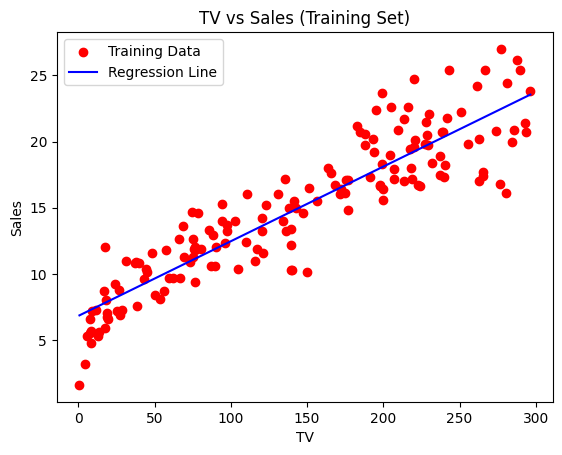

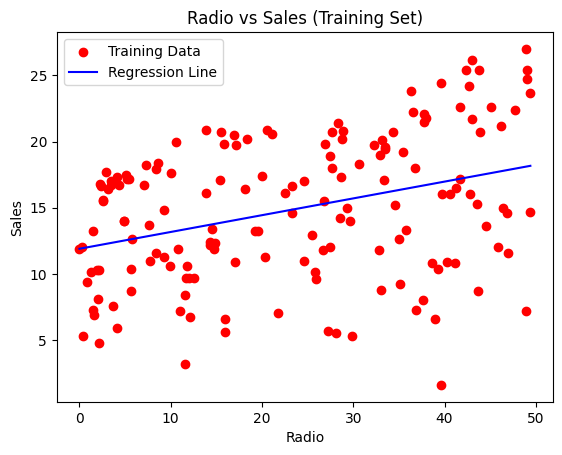

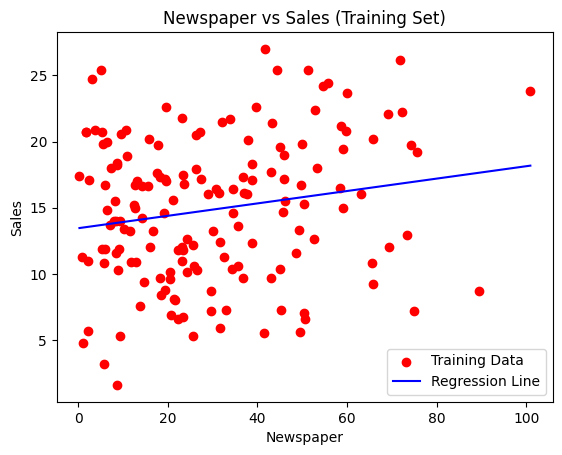

In [ ]:
for i in range(x.shape[1]):
    plt.figure()
    plt.scatter(x_train[:, i], y_train, color='red', label='Training Data')

    # Generate predicted values for the current feature
    x_pred = np.linspace(x_train[:, i].min(), x_train[:, i].max(), 100).reshape(-1, 1)
    regressor.fit(x_train[:, i].reshape(-1, 1), y_train)
    y_pred = regressor.predict(x_pred)

    plt.plot(x_pred, y_pred, color='blue', label='Regression Line')
    feature_names = ['TV', 'Radio', 'Newspaper']

    # Use the feature name from the list
    plt.title(f'{feature_names[i]} vs Sales (Training Set)')
    plt.xlabel(feature_names[i])
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

# Visualizing the testing set result

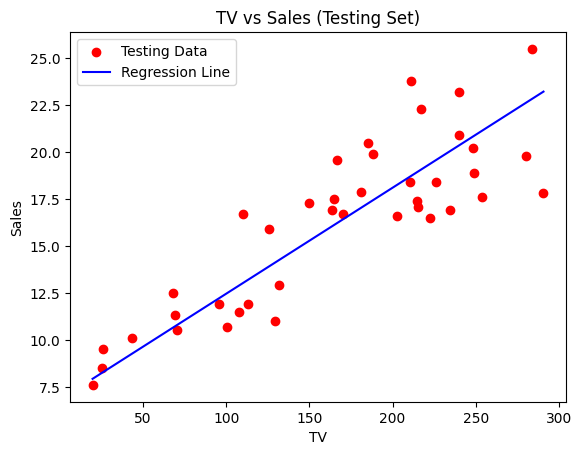

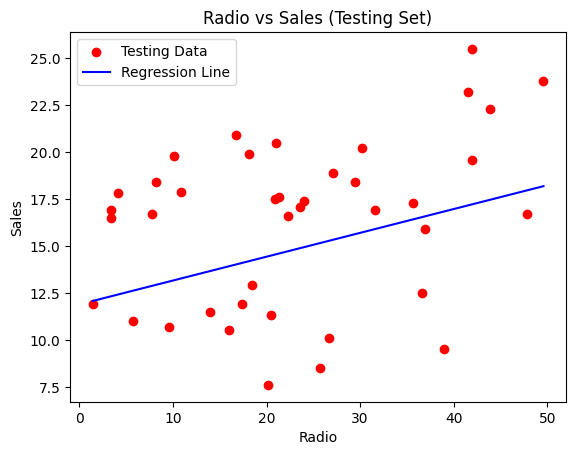

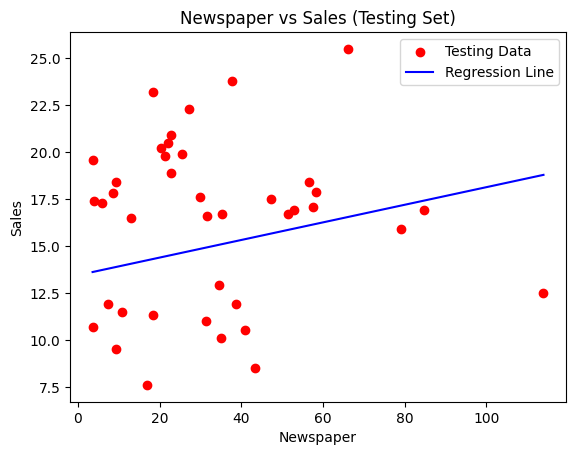

In [ ]:
for i in range(x.shape[1]):
    plt.figure()
    plt.scatter(x_test[:, i], y_test, color='red', label='Testing Data')

    # Generate predicted values for the current feature
    x_pred = np.linspace(x_test[:, i].min(), x_test[:, i].max(), 100).reshape(-1, 1)
    regressor.fit(x_train[:, i].reshape(-1, 1), y_train)
    y_pred = regressor.predict(x_pred)

    plt.plot(x_pred, y_pred, color='blue', label='Regression Line')
    feature_names = ['TV', 'Radio', 'Newspaper']

    # Use the feature name from the list
    plt.title(f'{feature_names[i]} vs Sales (Testing Set)')
    plt.xlabel(feature_names[i])
    plt.ylabel('Sales')
    plt.legend()
    plt.show()